<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch4_1~3_pg_142~181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**합성곱 신경망**

- CNN:데이터가 가진 특징들의 패턴을 학습하는 알고리즘

**1-1 이미지 표현**

이미지는 컴퓨터가 이해할 수 있도록 숫자로 표현해야한다.

- 화소는 이미지강도를 나타내고 클수록 강한 특성을 나타낸다.
- RGB도 숫자가 클수록 강한 색상의 이미지를 표현한다.

**1-2 합성곱**
- 입력 이미지에 대해 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법이다.
- 합성곱연산을 통해 추출된 이미지를 특성맴이라고 부른다.

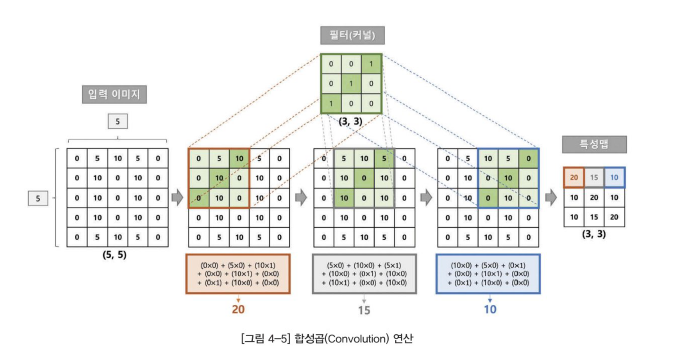

**1-2 채널**

이미지를 구성하는 2차원 배열의 개수를 나타낸다.

- 컬러 이미지와 같이 입력 이미지가 여러개의 채널을 갖는 경우 합성곱 연산을 수행할 때 특성맵 생성과정을 잘 살펴봐야한다.

- 입력이미지 채널 개수만큼 커널 생성, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행한다.

**1-4 스트라이드**
- 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나간다.

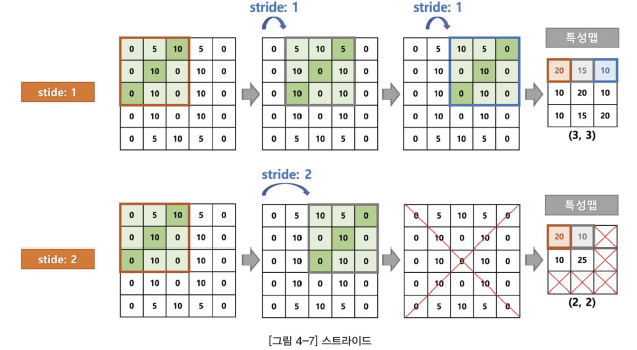

**1-5 패딩**
- 추출된 특성맵의 크기가 입력 이미지대비 줄어들지 않도록 패딩을 설정할 수 있다

**1-6 특성맵 사이즈**

데이터크기 구하는식

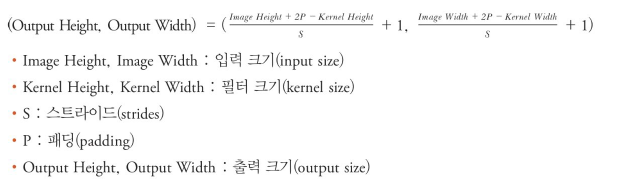

**1-7 풀링**
- 추출된 특성맵에 대해 다운샘플링하여 이미지의 크기를 축소하는 레이어이다. 과대적합 방지.

###**02 간단한 모델 생성**

**2-1 데이터 로드 및 전처리**

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


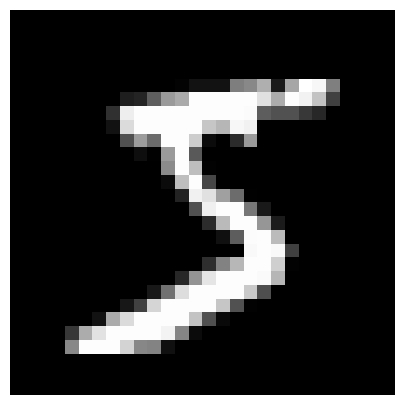

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5, 5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [7]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [5]:
# 정규화
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [8]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


**Sequential API로 모델 생성 및 학습**

합성곱레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 만든다.

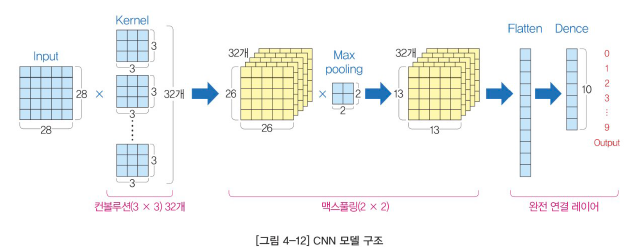

In [9]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2088 - accuracy: 0.9410 - val_loss: 0.0868 - val_accuracy: 0.9728
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0782 - accuracy: 0.9771 - val_loss: 0.0717 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0596 - accuracy: 0.9826 - val_loss: 0.0633 - val_accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.0565 - val_accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0553 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0564 -

In [11]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 5ms/step - loss: 0.0525 - accuracy: 0.9851


[0.05251851677894592, 0.9850999712944031]

훈련결과를 history객체에 저장. 10 epoch동안 모델의 예측 오차와 정확도를 그래프를 그리는 함수를 정의한다. -> 4epoch 이후부터 과대적합된것을 확인할 수 있다.

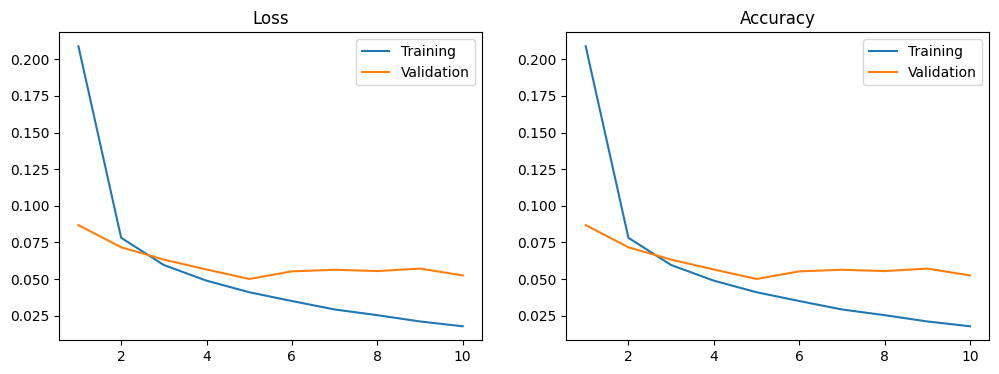

In [12]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

**2-3 모델 구조 파악**

- 각 레이어 이름과 출력 텐서의 형태, 각레이어를 구성하는 파라미터 개수를 알 수 있다.

In [13]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [15]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [16]:
# 레이어
model.layers

In [17]:
# 첫 번째 레이어 선택
model.layers[0]

In [18]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [19]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [20]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-3.13821226e-01, -2.71531604e-02,  2.07554519e-01,
            6.08394265e-01, -3.57883573e-02, -1.37876302e-01,
           -4.00051653e-01, -6.91737652e-01, -8.45690191e-01,
            4.82070476e-01,  2.18358904e-01, -6.85493946e-01,
           -1.04417503e+00, -1.50147766e-01, -1.35632768e-01,
           -9.55162823e-01,  3.07346314e-01,  3.63254964e-01,
           -7.23350763e-01,  4.85320315e-02, -3.72461557e-01,
            3.74276340e-01,  1.91656485e-01, -5.19964099e-02,
            3.56543809e-01,  2.56875634e-01,  2.20686093e-01,
            1.90268219e-01, -3.10334533e-01, -6.09296374e-02,
           -5.78479767e-01, -1.51882660e+00]],
 
         [[-8.04377198e-02,  3.04448977e-02,  1.35538906e-01,
            4.67010796e-01,  2.51137704e-01,  5.53773880e-01,
            3.12316865e-02, -1.21022783e-01, -1.42640507e+00,
           -4.56837891e-03, -2.02962890e-01, -4.78399009e-01,
           

커널 가중치 shape이 (3,3,1,32)라는 것을 알 수 있다.

In [21]:
# 커널 행렬의 가중치 또는 상수항을 따로 선택할 수도 있음
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-3.13821226e-01, -2.71531604e-02,  2.07554519e-01,
           6.08394265e-01, -3.57883573e-02, -1.37876302e-01,
          -4.00051653e-01, -6.91737652e-01, -8.45690191e-01,
           4.82070476e-01,  2.18358904e-01, -6.85493946e-01,
          -1.04417503e+00, -1.50147766e-01, -1.35632768e-01,
          -9.55162823e-01,  3.07346314e-01,  3.63254964e-01,
          -7.23350763e-01,  4.85320315e-02, -3.72461557e-01,
           3.74276340e-01,  1.91656485e-01, -5.19964099e-02,
           3.56543809e-01,  2.56875634e-01,  2.20686093e-01,
           1.90268219e-01, -3.10334533e-01, -6.09296374e-02,
          -5.78479767e-01, -1.51882660e+00]],

        [[-8.04377198e-02,  3.04448977e-02,  1.35538906e-01,
           4.67010796e-01,  2.51137704e-01,  5.53773880e-01,
           3.12316865e-02, -1.21022783e-01, -1.42640507e+00,
          -4.56837891e-03, -2.02962890e-01, -4.78399009e-01,
           1.04439080e-01,  

In [22]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.09548562, -0.12426127, -0.04438869, -0.01805232, -0.16562168,
        0.23683076, -0.36372867, -0.01112517, -0.02667767, -0.09424344,
       -0.06514063, -0.05865223, -0.04589428, -0.13728637, -0.27399415,
       -0.03607612, -0.02310067, -0.32856947, -0.1470503 , -0.24649575,
       -0.16503565, -0.24838966, -0.10751925, -0.02749653, -0.37517563,
       -0.22626282, -0.16682233, -0.23949675, -0.01453341, -0.00777966,
       -0.07992229, -0.01234426], dtype=float32)>

In [23]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [24]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 75ms/step


2

In [25]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

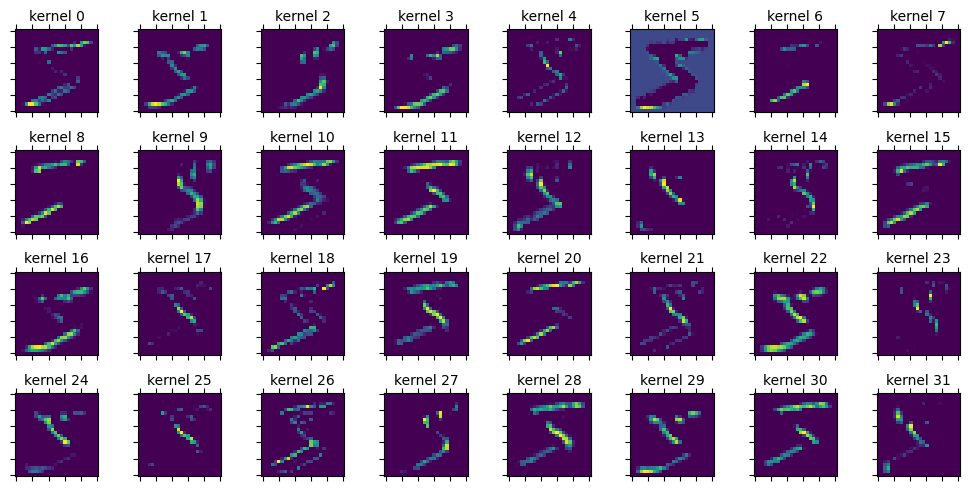

In [26]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()


In [27]:
# 두 번째 레이어는 최대 풀링 레이어, 여기서 출력하는 텐서는 (1, 13, 13, 32) 형태를 가짐
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


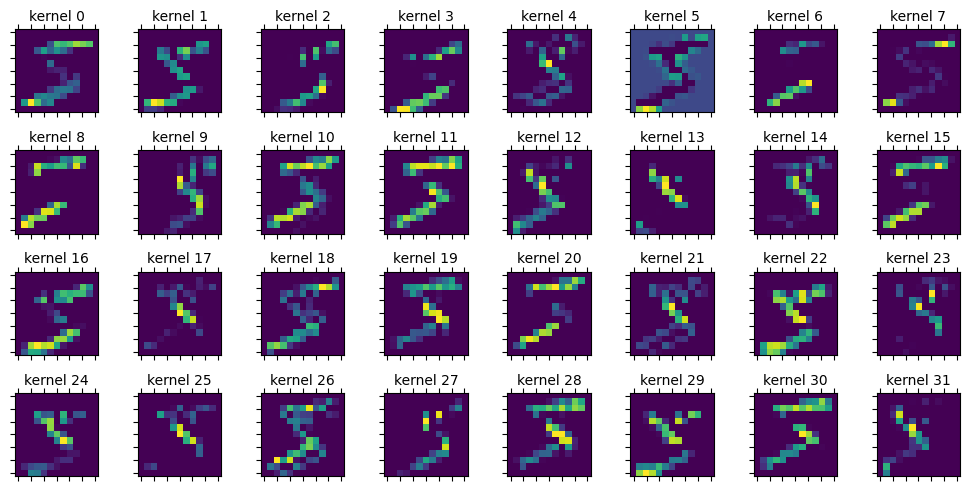

In [28]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

###**03 복잡한 모델 생성**

**3-1 데이터 셋 준비**

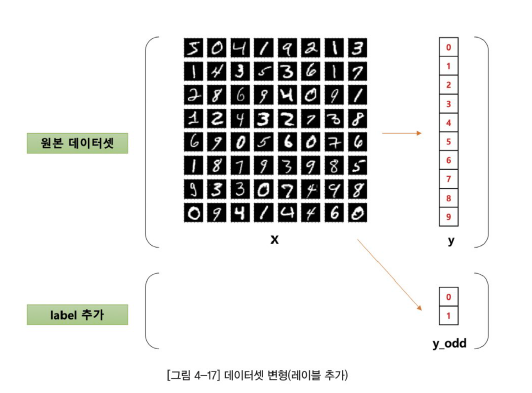

In [29]:
import tensorflow as tf
import numpy as np

In [30]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_vaild) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [31]:
# 새로운 출력 값 배열 생성(홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [32]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [33]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [34]:
#정규화
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


**3-2 Functional API로 다중 입력, 다중 출력 레이어 생성**

Functional API를 사용하면 사용자가 원하는 복잡한 구조의 모델을 만들 수 있다.

In [35]:
# Functional API 를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

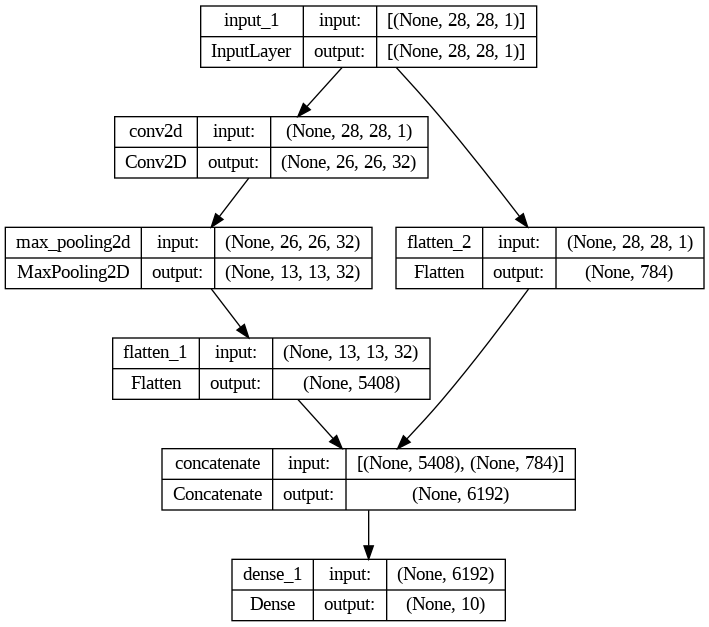

In [36]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1981 - accuracy: 0.9433 - val_loss: 0.0812 - val_accuracy: 0.9744
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0779 - accuracy: 0.9771 - val_loss: 0.0694 - val_accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0592 - accuracy: 0.9825 - val_loss: 0.0548 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0578 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0407 - accuracy: 0.9879 - val_loss: 0.0541 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0540 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0690 -

**3-3 다중 출력 분류 모델**

0~9까지 숫자를 맞추는 분류 문제와 짝수 홀수를 맞추는 분류문제를 동시에 푸는 모델.

In [38]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [39]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


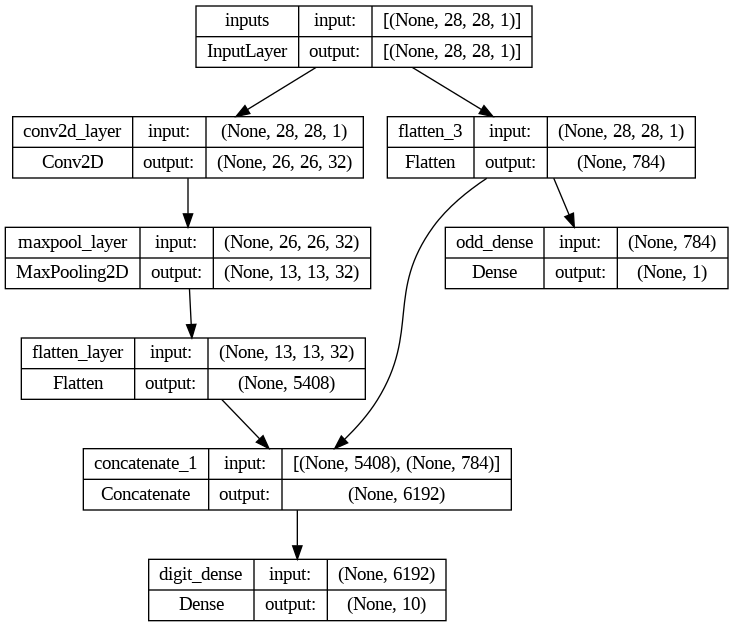

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [41]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3630 - digit_dense_loss: 0.2002 - odd_dense_loss: 0.3256 - digit_dense_accuracy: 0.9427 - odd_dense_accuracy: 0.8639 - val_loss: 0.2204 - val_digit_dense_loss: 0.0830 - val_odd_dense_loss: 0.2747 - val_digit_dense_accuracy: 0.9753 - val_odd_dense_accuracy: 0.8871
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2118 - digit_dense_loss: 0.0759 - odd_dense_loss: 0.2718 - digit_dense_accuracy: 0.9777 - odd_dense_accuracy: 0.8913 - val_loss: 0.1998 - val_digit_dense_loss: 0.0670 - val_odd_dense_loss: 0.2656 - val_digit_dense_accuracy: 0.9796 - val_odd_dense_accuracy: 0.8941
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1896 - digit_dense_loss: 0.0582 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9828 - odd_dense_accuracy: 0.8951 - val_loss: 0.1875 - val_digit_dense_loss: 0.0573 - val_odd_dense_loss: 0.2604 - val_digit_dense_accuracy: 0.9806 -

In [42]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 8ms/step - loss: 0.1917 - digit_dense_loss: 0.0639 - odd_dense_loss: 0.2557 - digit_dense_accuracy: 0.9832 - odd_dense_accuracy: 0.9016


[0.1917017251253128,
 0.06387047469615936,
 0.25566285848617554,
 0.9832000136375427,
 0.9016000032424927]

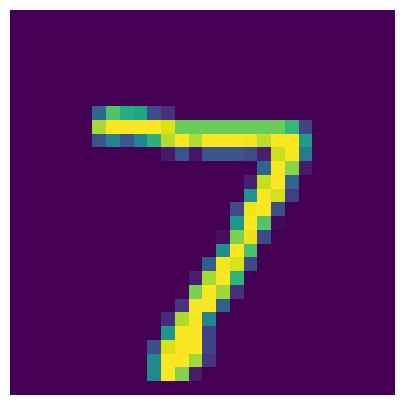

In [43]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5, 5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

첫번째 예측값은 10개 분류 레이블에 대한 확률, 두번째는 홀수일 확률을 담고 있다.

In [44]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 7ms/step
[1.7001502e-12 3.0783207e-09 2.5755984e-08 7.9120611e-07 1.9376971e-11
 1.3387595e-11 5.0762711e-20 9.9999911e-01 5.1480442e-09 1.5684992e-09]
[0.99953765]


In [45]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [46]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-46-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

**3-4 전이학습**

최종 출력층만 새로 추가하여 모델을 재구성한다.

In [47]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


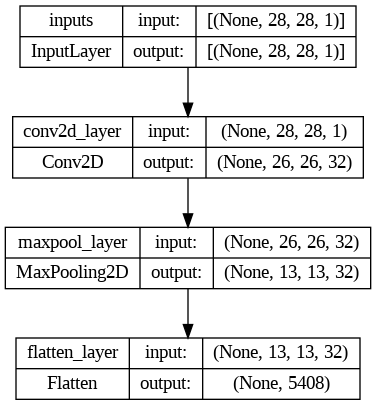

In [48]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [49]:
# Sequential API 적용

digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


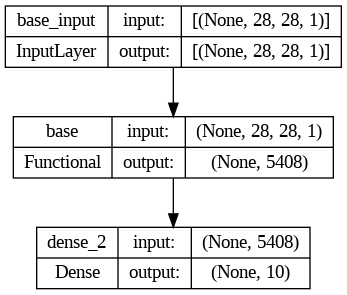

In [50]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [51]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1323 - accuracy: 0.9620 - val_loss: 0.0618 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0573 - accuracy: 0.9827 - val_loss: 0.0552 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0435 - accuracy: 0.9868 - val_loss: 0.0526 - val_accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.0520 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0508 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0543 -

In [52]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [53]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [54]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1150 - accuracy: 0.9678 - val_loss: 0.0546 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0487 - accuracy: 0.9855 - val_loss: 0.0516 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0520 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0507 - val_accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0533 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0519 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0530 - val_ac

In [55]:
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [56]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [57]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1155 - accuracy: 0.9689 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0484 - accuracy: 0.9859 - val_loss: 0.0546 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0499 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0542 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.0487 - val_accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0521 - val_accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0590 - val_ac